In [3]:
import cv2
import matplotlib.pyplot as plt
import IPython.display as ipd
import subprocess

CONVERTING VIDEO TYPE from .avi to .mp4

In [ ]:
input_file = 'Video_processing/Video.avi'
subprocess.run(['ffmpeg', '-i', input_file, '-qscale', '0', 'OKNO_4.mp4'])

In [2]:
ipd.Video('Video.mp4')

OPEN VIDEO AND READ METADATA

In [4]:
#load a video file
cap = cv2.VideoCapture('Video.mp4')

count = cap.get(cv2.CAP_PROP_FRAME_COUNT)

height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

fps = cap.get(cv2.CAP_PROP_FPS)

print(f'Frames {count}, Height {height}, Width {width}, FPS {fps}')




Frames 2250.0, Height 174.0, Width 280.0, FPS 30.0


Taking a frame id (number), and saving it as a new file .png

In [5]:
# Taking frame id from a specified time in video
minutes = 0
seconds = 25
frame_id = int(fps*(minutes*60 + seconds))
print('frame id =',frame_id)

frame id = 750


In [ ]:
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
ret, frame = cap.read()

t_msec = 1000*(minutes*60 + seconds)
cap.set(cv2.CAP_PROP_POS_MSEC, t_msec)
ret, frame = cap.read()

cv2.imshow('frame', frame); cv2.waitKey(0)
cv2.imwrite('my_video_frame.png', frame)

In [4]:
#realesing video object from cap
cap.release()

Pulling in images from video

In [6]:
cap = cv2.VideoCapture('Video.mp4')
ret, img = cap.read()
print(f'Returned {ret}, and img of shape {img.shape}')

Returned True, and img of shape (174, 280, 3)


In [7]:
# Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis('off')

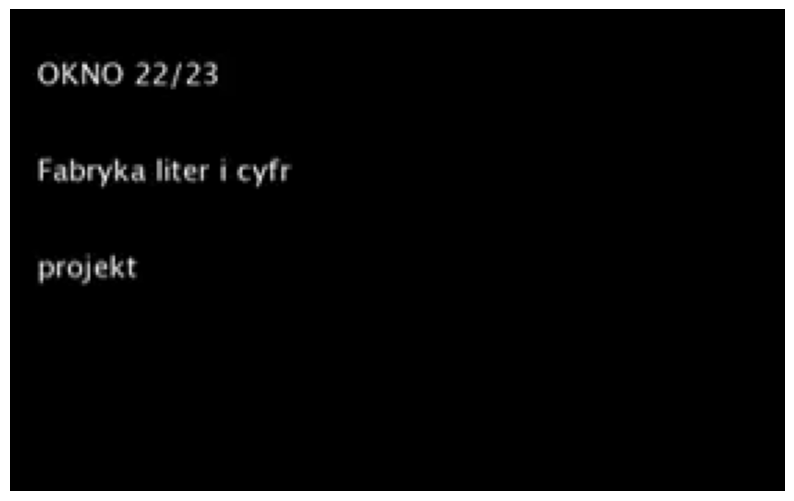

In [8]:
display_cv2_img(img)

In [9]:
cap.release()

DISPLAY MULTIPLE FRAMES FROM THE VIDEO

There is a 2250 in a video file.


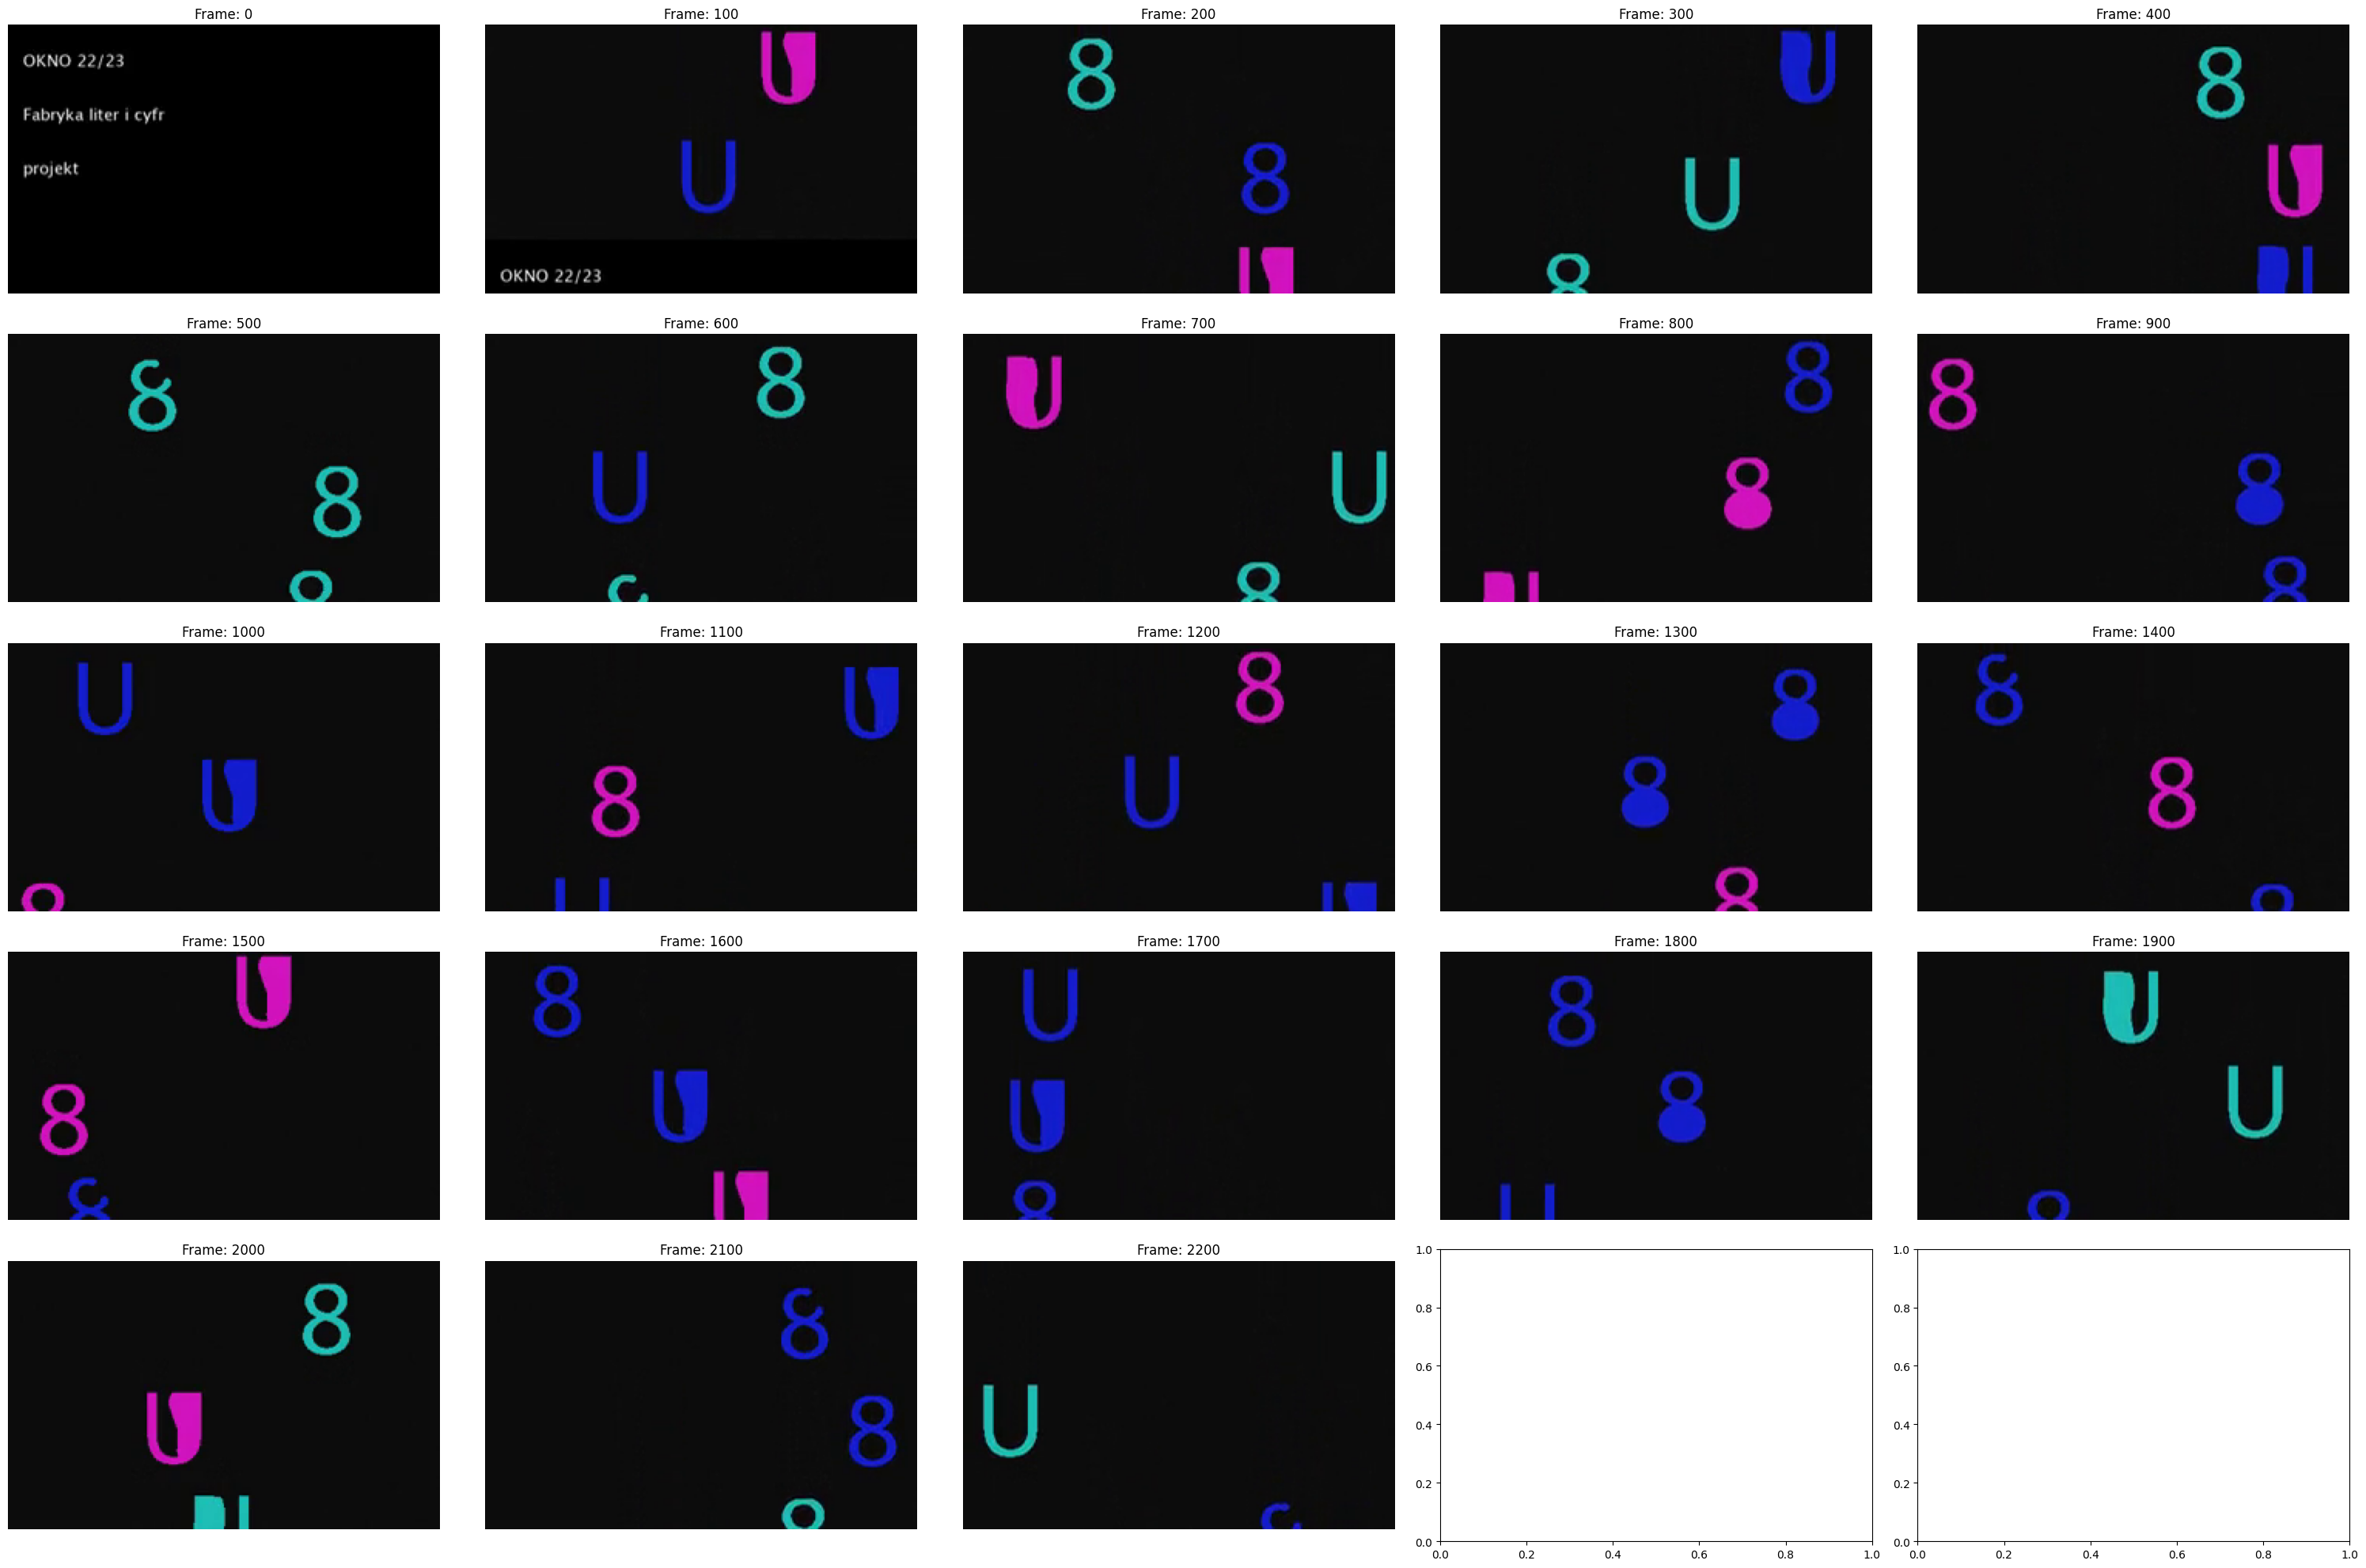

In [11]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()    

cap = cv2.VideoCapture("Video.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f'There is a {n_frames} frames in a video file.')
img_idx = 0

for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame %100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

ADD ANNOTATIONS TO VIDEO IMAGES

In [12]:
cap = cv2.VideoCapture("Video.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, image = cap.read()
    if ret == False:
        break
    if frame == 200:
        break
cap.release()

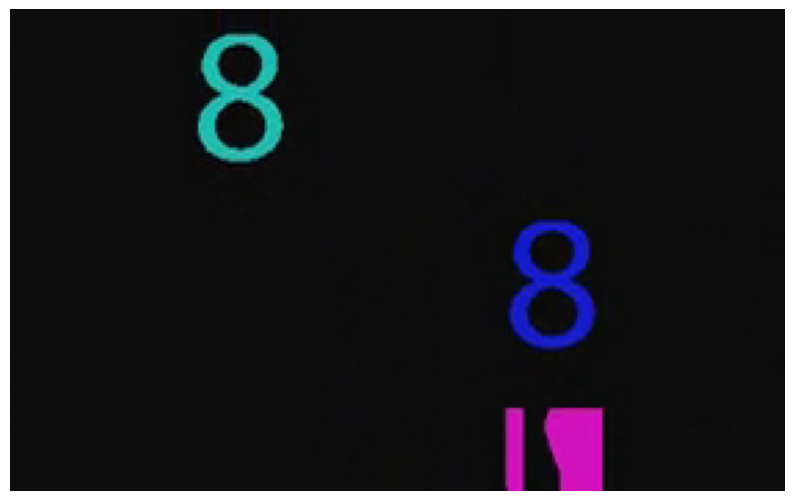

In [13]:
display_cv2_img(image)

In [9]:
import cv2
  
# reading image
img = cv2.imread('frame_185_bw.png')
  
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, hierarhy = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
i = 0
  
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 1)
  
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    # calculate length of contour shape
    length = cv2.arcLength(contour, True)
    print(length)
    
# displaying the image after drawing contours
cv2.imshow('shapes', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

178.7523069381714
60.52691125869751
225.25483310222626


Check the contours [hierarchy](https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html) type and shape 

In [13]:
# this can be helpful in objects analysis

print(type(hierarhy))
print(hierarhy.shape)


<class 'numpy.ndarray'>
(1, 4, 4)


In [11]:
hierarhy

array([[[ 1, -1, -1, -1],
        [ 3,  0,  2, -1],
        [-1, -1, -1,  1],
        [-1,  1, -1, -1]]], dtype=int32)

In [14]:
hierarhy[0][1][1]

0